In [121]:
# guided project on concrete

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

NB_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(NB_DIR)

RAW_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'raw')
os.makedirs(RAW_DATA_DIR, exist_ok=True)

xls_path = os.path.join(RAW_DATA_DIR, 'Concrete_Data.xls')


In [122]:
df = pd.read_excel(xls_path)
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'cement_kg_m3',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag_kg_m3',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'ash_kg_m3',
    'Water  (component 4)(kg in a m^3 mixture)': 'water_kg_m3',
    'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'SP_kg_m3',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'CA_kg_m3',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'FA_kg_m3',
    'Age (day)' : 'age_day',
    'Concrete compressive strength(MPa, megapascals) ': 'fc_MPa'
}).copy()

df['w/c_ratio'] = df['water_kg_m3']/df['cement_kg_m3']


# loc; we do ,loc[a,b], a is the index of the rows, and b is the list of columns only, axis= in methods only

#df1 = (df.loc[(df['w/c_ratio']>1) & (df['fc_MPa']<50)]).copy()
#df.isna().sum()
# to check for NaN values
df

,cement_kg_m3,slag_kg_m3,ash_kg_m3,water_kg_m3,SP_kg_m3,CA_kg_m3,FA_kg_m3,age_day,fc_MPa,w/c_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,0.649783
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,0.608318
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,1.297643
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,1.103708


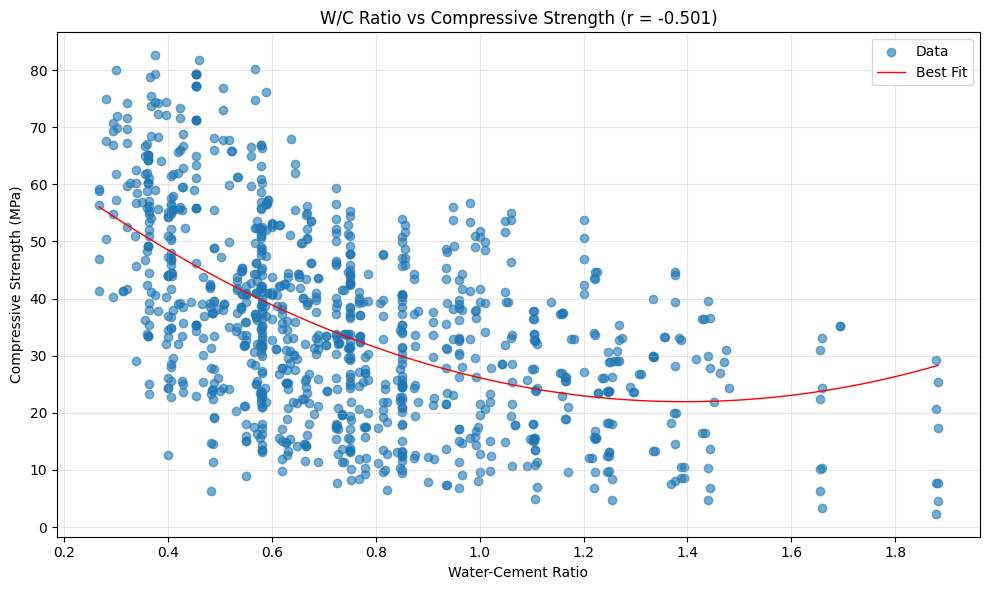

In [123]:

# Plot 1: W/C Ratio vs Compressive Strength
r_wc = df['w/c_ratio'].corr(df['fc_MPa'])

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['w/c_ratio'], df['fc_MPa'], alpha=0.6, label='Data')

# Add best fit line (polynomial degree 2 = quad)
# z = numpy array of coeff for the polynomial
z = np.polyfit(df['w/c_ratio'], df['fc_MPa'], 2)
# p is the callable polynomial object created from z
p = np.poly1d(z) # 1d means for single variable x
# x_line generates smooth x-values
# y valuaes is calc using p(x_line) like f(x) =y
x_line = np.linspace(df['w/c_ratio'].min(), df['w/c_ratio'].max(), 100)
ax.plot(x_line, p(x_line), 'r-', linewidth=1, label='Best Fit')

ax.set_xlabel('Water-Cement Ratio')
ax.set_ylabel('Compressive Strength (MPa)')
ax.set_title(f'W/C Ratio vs Compressive Strength (r = {r_wc:.3f})')
ax.grid(True, alpha=0.3)
ax.legend()

# Automatically adjusts subplot spacing so labels don't overlap
plt.tight_layout()
plt.show()




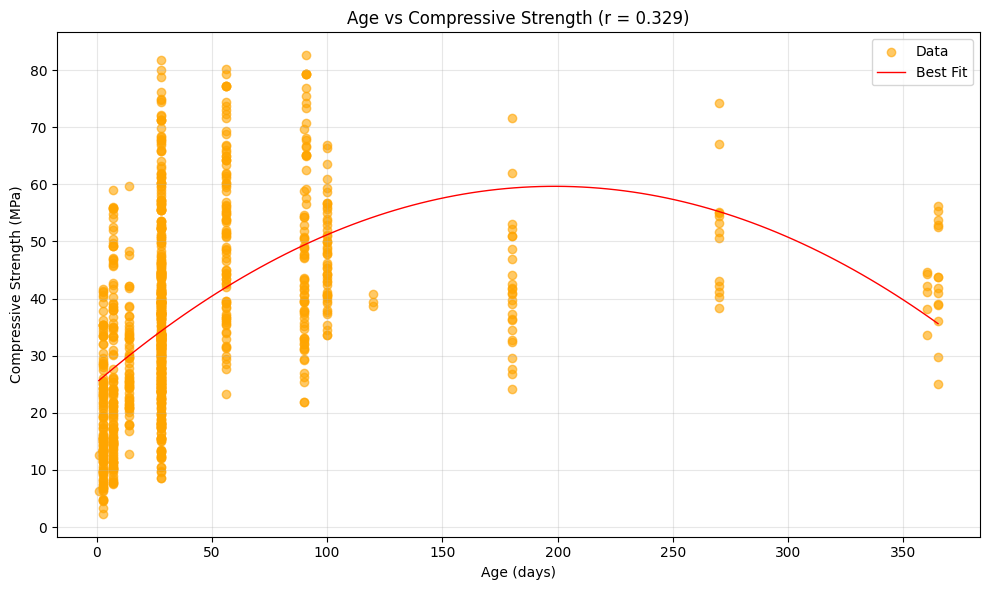

In [124]:
# Plot 2: Age vs Compressive Strength

r_age = df['age_day'].corr(df['fc_MPa'])

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['age_day'], df['fc_MPa'], alpha=0.6, color='orange', label='Data')

# Add best fit line
z = np.polyfit(df['age_day'], df['fc_MPa'], 2)
p = np.poly1d(z)
x_line = np.linspace(df['age_day'].min(), df['age_day'].max(), 100)
ax.plot(x_line, p(x_line), 'r-', linewidth=1, label='Best Fit')

ax.set_xlabel('Age (days)')
ax.set_ylabel('Compressive Strength (MPa)')
ax.set_title(f'Age vs Compressive Strength (r = {r_age:.3f})')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

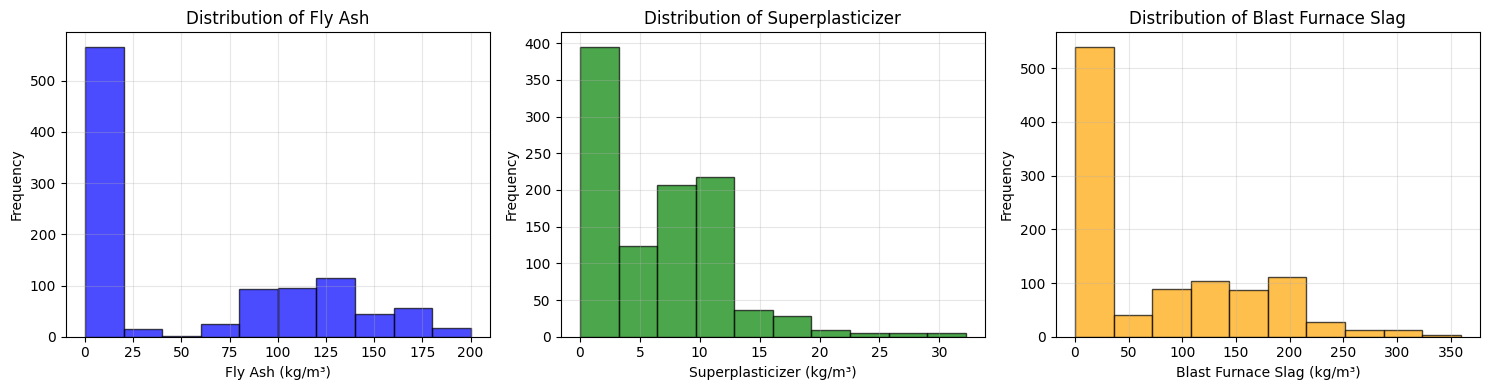

In [125]:
# Plot histograms for fly_ash, superplasticizer, and blast_furnace_slag

# histograms generally for categorical data

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# for multiple subplots

# Histogram 1: Fly Ash
axes[0].hist(df['ash_kg_m3'], bins=10, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Fly Ash (kg/m³)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fly Ash')
axes[0].grid(True, alpha=0.3)

# Histogram 2: Superplasticizer
axes[1].hist(df['SP_kg_m3'], bins=10, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Superplasticizer (kg/m³)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Superplasticizer')
axes[1].grid(True, alpha=0.3)

# Histogram 3: Blast Furnace Slag
axes[2].hist(df['slag_kg_m3'], bins=10, color='orange', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Blast Furnace Slag (kg/m³)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Blast Furnace Slag')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [126]:
#todo
#Calculate the correlation matrix and identify highly correlated columns.

# for numeric values only, answers when one variable trends, what happens to other

# if data closely correlated (linear), we wont take for ml train, cuz trend is same
# using .corr (pd) df_col1.corr(df_col2)
# big man ting idea to show corr in title of chart

corr_pearson = df.corr(numeric_only=True, method='pearson')
corr_spearman = df.corr(numeric_only=True, method='spearman')

#corr_pearson  # its default, linear trends
#corr_spearman # trend curved but monotonic


# triu is convention, stack() ma no problems and k=1, for tril use k =-1
# k=1 means start above the diagonal cuz we want to remove self corr as well
# becomes an array of 0s and 1s (above D), mask them as true or false
# corr_pear.where(mask) -> keeps value for true, others replaced by NaN
#upper = corr_pearson.where(np.triu(np.ones(corr_pearson.shape), k=1).astype(bool))

abs_corr = corr_pearson.abs()
upper = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))
# abs cuz we want to see the strong links only together
upper


,cement_kg_m3,slag_kg_m3,ash_kg_m3,water_kg_m3,SP_kg_m3,CA_kg_m3,FA_kg_m3,age_day,fc_MPa,w/c_ratio
cement_kg_m3,NaN,0.275193,0.397475,0.081544,0.092771,0.109356,0.222720,0.081947,0.497833,0.879121
slag_kg_m3,NaN,NaN,0.323569,0.107286,0.043376,0.283998,0.281593,0.044246,0.134824,0.357317
ash_kg_m3,NaN,NaN,NaN,0.257044,0.377340,0.009977,0.079076,0.154370,0.105753,0.245994
water_kg_m3,NaN,NaN,NaN,NaN,0.657464,0.182312,0.450635,0.277604,0.289613,0.332962
SP_kg_m3,NaN,NaN,NaN,NaN,NaN,0.266303,0.222501,0.192717,0.366102,0.223417
CA_kg_m3,NaN,NaN,NaN,NaN,NaN,NaN,0.178506,0.003016,0.164928,0.034254
FA_kg_m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156094,0.167249,0.066603
age_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.328877,0.029268
fc_MPa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500700
w/c_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# list strong pairs
threshold = 0.65
high_pairs = (
    upper.stack()
         .sort_values(ascending=False)
    .reset_index(name='corr')
    .rename(columns=
            {
                'level_0': 'var_1',
                'level_1': 'var_2'
            })   # row col corr
)
high_pairs = high_pairs[high_pairs['corr'] >= threshold]
high_pairs


,var_1,var_2,corr
0,cement_kg_m3,w/c_ratio,0.879121
1,water_kg_m3,SP_kg_m3,0.657464


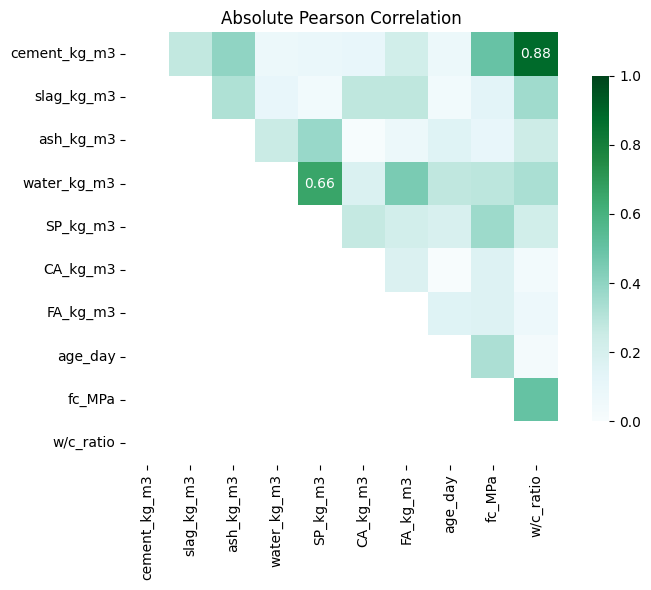

In [128]:


mask = np.tril(np.ones_like(abs_corr, dtype=bool))  # hide diagonal + upper
# array of true and false; _like creates array of same shape as abs corr (or use .shape as before)
plt.figure(figsize=(8,6))

# annot_vals is a df, same shape as abs_corr, values+empty string for others
# sns.heatmap accepsts 2d arrays (np or pd df)
annot_vals = abs_corr.where(abs_corr >= threshold).round(2).fillna("")
sns.heatmap(abs_corr, mask=mask, annot=annot_vals, fmt="", cmap='BuGn', vmin=0, vmax=1,
            square=True, cbar_kws={'shrink': 0.8})
# makes the hm boxes square
# cbs shrinks colorbar to 0.8 times its og length (when plot is small/crowded)
# cuz we have 0 to 1 in the abs corr values
# annot shows the r values in the indi sq box
plt.title('Absolute Pearson Correlation')
plt.tight_layout()
plt.show()

